 ## step1.ipynb

This notebook implements parts of the first step in the 5/28/18 plan.  
The first part of the plan (e.g. implementation of `double_sigma` units with sharpen ports) was tested in ../tests/test10.ipynb .

By `Sergio Verduzco`  
June 2018

### First part
Recreate the simulation in the __test 4__ section of test10.ipynb, this time using the ei_network framework.

__Proceed here directly after reset.__

The `sharpen` port will be 2, and the `rdc` port will be 0, where e,i inputs will arrive. Inputs arrive at port 1. 
Inputs to the sharpen port are set manually (without ei_net methods).


In [1]:
# import the ei_network class and draculab
%cd ..
from ei_network import *

/home/z/projects/draculab


In [2]:
# create the network using the ei_network tools
layers = ['L', 'shrp']  # L is the layer, shrp is the extra input to the sharpen port
ei_net = ei_network(layers)

In [3]:
# Configure layer parameters
L = ei_net.layers['L']
shrp = ei_net.layers['shrp']
#----------------------------------
L.set_param('e_pars', 'type', unit_types.ds_sharp)
L.set_param('e_pars', 'slope_min', 6.)
L.set_param('e_pars', 'slope_wid', .1)
L.set_param('e_pars', 'thresh_min', .3)
L.set_param('e_pars', 'thresh_wid', 0.1)
L.set_param('e_pars', 'n_ports', 3)
L.set_param('e_pars', 'branch_params', {'branch_w' : [0.5, 0.5], 'slopes' : 4, 'threshs' : 0.1})
L.set_param('e_pars', 'tau_slow', 10.)
L.set_param('e_pars', 'tau_fast', 0.05)
L.set_param('e_pars', 'c', 2.)
L.set_param('e_pars', 'tau_thr', .002)
L.set_param('e_pars', 'rdc_port', 0)
L.set_param('e_pars', 'thr_fix', 0.2)
L.set_param('e_pars', 'sharpen_port', 2)
#----------------------------------
L.annotate("Adjusting size of e,i groups.")
L.set_param('e_geom', 'rows', 8)
L.set_param('e_geom', 'columns', 8)
L.set_param('i_geom', 'rows', 4)
L.set_param('i_geom', 'columns', 4)
L.annotate("Compensating for the ratio of excitatory to inhibitory units.")
L.set_param('ee_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
L.set_param('ei_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
L.set_param('ie_conn', 'weights',{'uniform' : {'low': -1.5, 'high' : -.1}})
L.set_param('ii_conn', 'weights',{'uniform' : {'low': -1., 'high' : -0.01}})
#----------------------------------
L.annotate("Setting input parameters")
L.set_param('x_geom', 'rows', 5) 
L.set_param('x_geom', 'columns', 5) 
L.set_param('xe_conn', 'weights', {'uniform' : {'low': 0.05, 'high' : 4.}})
L.set_param('xi_conn', 'weights', {'uniform' : {'low': 0.05, 'high' : 4.}})
L.set_param('xe_conn', 'mask', {'circular': {'radius': .3}})
L.set_param('xi_conn', 'mask', {'circular': {'radius': .3}})
#-----------------------------------
# specifying input ports
L.set_param('ee_syn', 'inp_ports', 0) # ee should be at input 0 for trdc units
L.set_param('xe_syn', 'inp_ports', 1)
#L.set_param('xi_syn', 'inp_ports', 1)
L.set_param('ie_syn', 'inp_ports', 0)
#----------------------------------
L.annotate("Using Oja input synapses")
L.set_param('xe_syn', 'type', synapse_types.oja)
L.set_param('xe_syn', 'lrate', 1./100.)
L.set_param('xi_syn', 'type', synapse_types.oja)
L.set_param('xi_syn', 'lrate', 1./100.)
#----------------------------------
L.annotate("Using BCM EE synapses")
L.set_param('ee_syn', 'type', synapse_types.bcm)
L.set_param('ee_syn', 'lrate', 1./100.)
#L.set_param('ee_syn', 'omega', 2.)
#----------------------------------
L.annotate("Using corr_homeo_inhib IE synapses")
L.set_param('ie_syn', 'type', synapse_types.corr_inh)
L.set_param('ie_syn', 'lrate', 1./20.)
L.set_param('e_pars', 'des_act', 0.4)
#----------------------------------
L.annotate("Using anti_cov_pre EI synapses")
L.set_param('ei_syn', 'type', synapse_types.anticov_pre)
L.set_param('ei_syn', 'lrate', .02)
#----------------------------------
shrp.annotate("Leaving a single input unit in the layer")
shrp.set_param('e_geom', 'rows', 0)
shrp.set_param('i_geom', 'rows', 0)
shrp.set_param('x_geom', 'rows', 1)
shrp.set_param('x_geom', 'columns', 1)
#----------------------------------
shrp.annotate("Configuring sharpening unit")
shrp.set_param('x_pars', 'function', lambda x : None)
shrp.set_param('x_pars', 'init_val', 1.)
shrp.set_param('x_pars', 'coordinates', np.array([0.,0.]))
#----------------------------------
L.set_param('n', 'w_track', 16)
shrp.set_param('n', 'w_track', 0)
#----------------------------------

In [4]:
# Add interlayer connections
ei_net.add_connection(('shrp','x'), ('L','e'))

In [5]:
# Configure interlayer connections
ei_net.set_param('shrpx_Le_conn', 'mask',{'circular': {'radius': 10.}})
ei_net.set_param('shrpx_Le_conn', 'kernel', 1.)
ei_net.set_param('shrpx_Le_conn', 'weights', {'uniform' : {'low': 1., 'high': 1.}})
ei_net.set_param('shrpx_Le_syn', 'init_w', 1.)
ei_net.set_param('shrpx_Le_syn', 'inp_ports', L.e_pars['sharpen_port'])

In [6]:
# Build the network
ei_net.build()

Building layer L
Building layer shrp
Creating shrpx_Le connection


/home/z/projects/draculab/topology.py:279: UserWarning: topo_connect received an empty list as an argument
  warn('topo_connect received an empty list as an argument', UserWarning)


In [7]:
# Creating input patterns
## The patterns of L.x
n_pat = 4  # number of input patterns
pat_arr = np.zeros((4, 25)) # ei_runner.n['x'])) # array with all input patterns

for row in range(5):
    for col in range(5):
        idx = 5*col + row
        if row == col or row+col == 4: # The X input pattern
            pat_arr[0,idx] = 1
        if row == 2 or col == 2:  # The + input pattern
            pat_arr[1,idx] = 1
        if row == 1 or row == 3:  # The = input pattern
            pat_arr[2,idx] = 1
        if col == 1 or col == 3:  # The || input pattern
            pat_arr[3,idx] = 1
pat_arr = pat_arr / 5.

def inp_pat(pres, rows, columns, port=0, random=False):
    # The function that creates the input pattern shown at each presentation in ei_net.run
    if random:
        idx = np.random.randint(4)
    else:
        idx = pres % 4
    return pat_arr[idx, :]

## The pattern of shrp.x is irrelevant, we set it using the set_inp_fun argument
shrp_inp_pat = lambda p, r, c : 1.


def make_shrp_fun(prev_pat, cur_pat, init_time, pres_time, inp_units):
    eps = .25 # distance to the input change where sharpening is released
    return lambda t : 0. if (t < init_time+eps or t > init_time+pres_time-eps) else 1.

def set_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units):
    for unit in inp_units:
            unit.set_function( make_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units) )

inp_pat_dic = {'L' : inp_pat, 'shrp' : shrp_inp_pat}
inp_fun_dic = {'shrp' : set_shrp_fun }

In [8]:
# Simulating
n_pres = 10
pres_time = 2.
    
ei_net.run(n_pres, pres_time, set_inp_pat=inp_pat_dic, set_inp_fun=inp_fun_dic)

Starting presentation 0
Presentation 0 took 15.854692220687866 seconds 
Starting presentation 1
Presentation 1 took 15.493371963500977 seconds 
Starting presentation 2
Presentation 2 took 15.515767574310303 seconds 
Starting presentation 3
Presentation 3 took 15.292382717132568 seconds 
Starting presentation 4
Presentation 4 took 15.288546085357666 seconds 
Starting presentation 5
Presentation 5 took 15.629012823104858 seconds 
Starting presentation 6
Presentation 6 took 15.567259788513184 seconds 
Starting presentation 7
Presentation 7 took 15.392329692840576 seconds 
Starting presentation 8
Presentation 8 took 15.350739002227783 seconds 
Starting presentation 9
Presentation 9 took 15.69082760810852 seconds 
Total execution time is 155.07913374900818 seconds 
----------------------


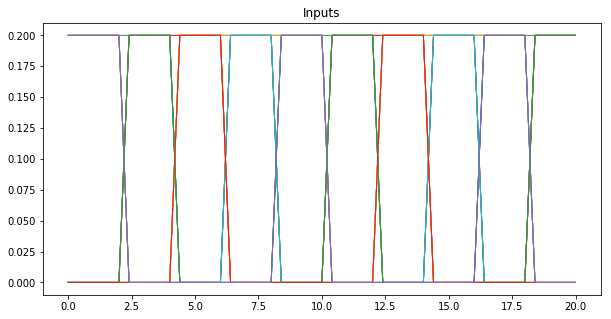

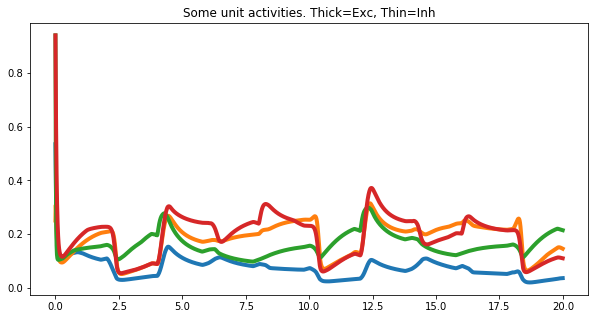

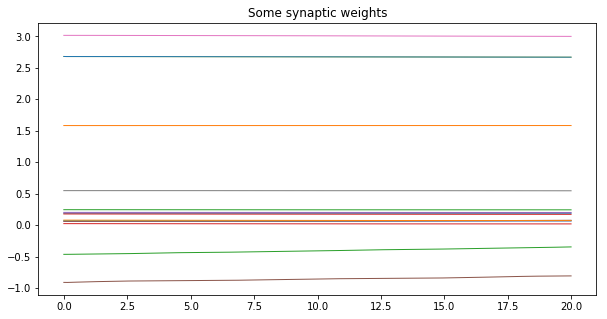

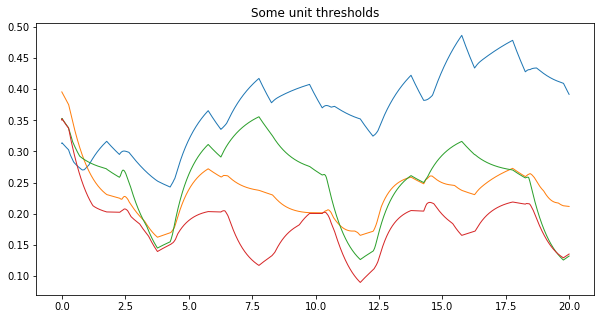

In [9]:
%matplotlib inline
ei_net.basic_plot('L')

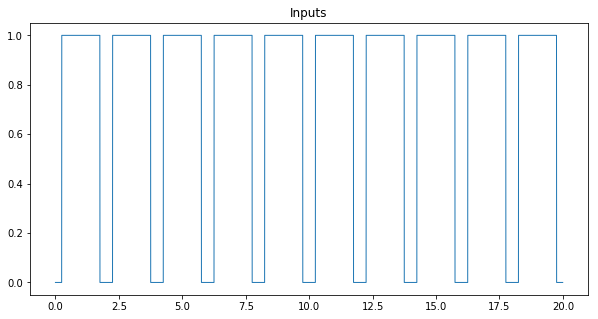

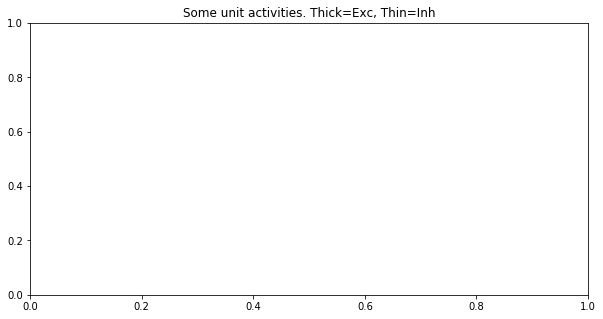

In [10]:
%matplotlib inline
ei_net.basic_plot('shrp')

In [13]:
ei_net.double_anim(L.e, slider=False, interv=20, nbins=20, thr=0.5, pdf=True)

[61 22 10 51 18]


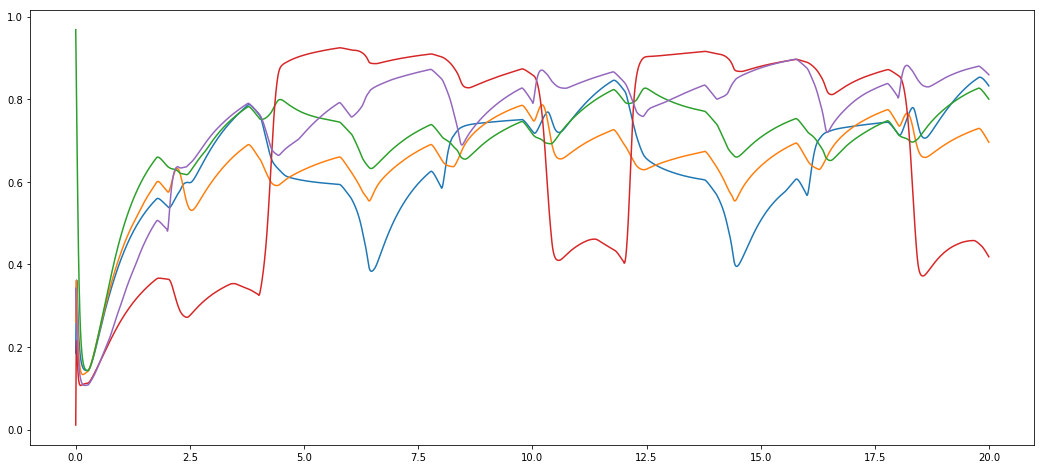

In [11]:
# Plot the highest excitatory unit activities
%matplotlib inline
n_top = 5  # how many units to plot
top_pop = np.array(L.e)  # population to visualize
top_units = ei_net.all_activs[top_pop].sum(1).argpartition(-n_top)[-n_top:]
print(top_units)
top_act_fig = plt.figure(figsize=(18,8))
top_acts = ei_net.all_activs[top_pop[top_units]].transpose()
plt.plot(ei_net.all_times, top_acts)
plt.show()

[39 21 62  3 29 34 43  0  8]


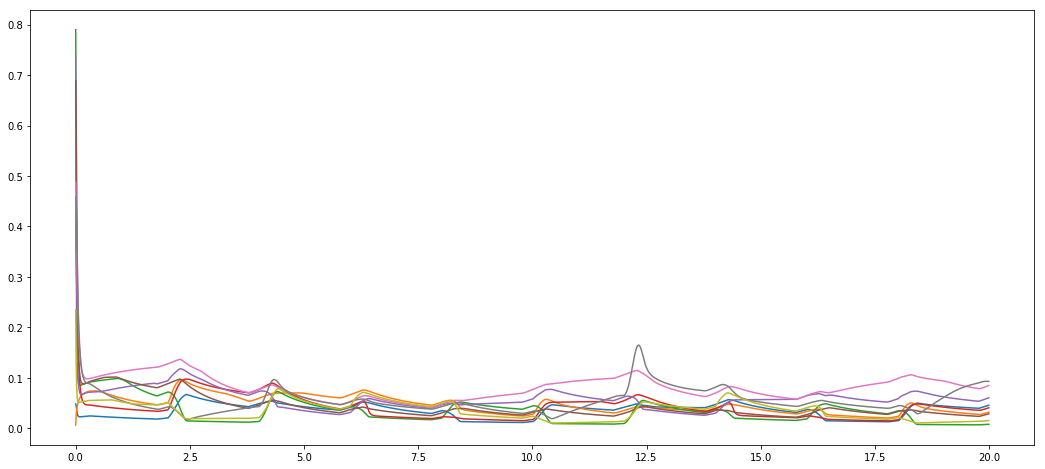

In [12]:
# Plot the lowest excitatory unit activities
n_bottom = 10  # how many units to plot
bottom_pop = np.array(L.e)  # population to visualize
bottom_units = ei_net.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = ei_net.all_activs[bottom_pop[bottom_units]].transpose()
plt.plot(ei_net.all_times, bottom_acts)
plt.show()

In [16]:
ei_net.hist_anim(L.e)